# Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

**Major Steps Involved:**
1. **Text Data Visualisation**
2. **Text Data Preprocessing**
3. **Text Data To Numerical Vector Conversion using:**
  - **Word2Vec**
  - **Pretrained GloVe**
  - **Pretrained BERT**

We will follow the steps mentioned below:

1. Data Loading
2. Exploratory Data Analysis
3. Data Preparation
    - Train Test Split
    - Data Preprocessing (special characters, stop words, lower case, stemming, etc)
    - Converting text to numerical vector using Word2Vec, Pretrained GloVe and BERT
    - Preprocessing Test Data
4. Training on Train Data
5. Predictions on Test Data
6. Model Evaluation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Read the Data

In [5]:
df = pd.read_csv('data/email_data.csv')

df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df.shape

(5171, 4)

### Exploratory Data Analysis

In [7]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [8]:
df['label'].value_counts(normalize=True)

ham     0.710114
spam    0.289886
Name: label, dtype: float64

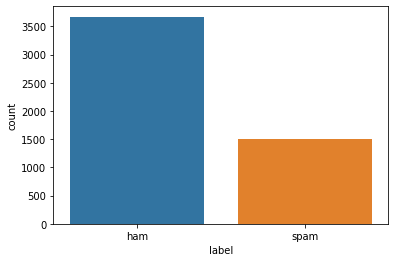

In [9]:
sns.countplot(x='label', data=df)

### Data Preparation - Split the data into train and test set

In [10]:
df.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [11]:
df = df.drop('Unnamed: 0', axis=1)

df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
y = df['label']
X = df[['text']]

In [13]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train.head()

,text
5132,Subject: april activity surveys\r\nwe are star...
2067,Subject: message subject\r\nhey i ' am julie ^...
4716,Subject: txu fuels / sds nomination for may 20...
4710,Subject: re : richardson volumes nov 99 and de...
2268,Subject: a new era of online medical care .\r\...


In [15]:
X_train.shape

(4136, 1)

### Data Prepration - Text Preprocessing

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [19]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [20]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [21]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time

In [22]:
# !pip install tqdm

In [23]:
from tqdm import tqdm, tqdm_notebook

In [24]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [25]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`

temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()

100%|██████████| 4136/4136 [01:01<00:00, 67.25it/s]


,0,1
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [26]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
5132,subject april activ survey start collect data ...,88
2067,subject messag subject hey juli turn high scho...,44
4716,subject txu fuel sd nomin may attach may nomin...,34
4710,subject richardson volum nov dec meter nick su...,105
2268,subject new era onlin medic care new era onlin...,36


In [27]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36


In [28]:
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 4136/4136 [00:56<00:00, 72.99it/s]


,0,1
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [29]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
5132,subject april activity survey starting collect...,88
2067,subject message subject hey julie turned high ...,44
4716,subject txu fuel sd nomination may attached ma...,34
4710,subject richardson volume nov dec meter nick s...,105
2268,subject new era online medical care new era on...,36


In [30]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


In [31]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


### Creating the WordCloud for Spam Emails

In [32]:
# !pip install wordcloud

In [33]:
from wordcloud import WordCloud

In [34]:
y_train

5132     ham
2067    spam
4716     ham
4710     ham
2268    spam
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 4136, dtype: object

In [35]:
spam_df = X_train.loc[y_train=='spam', :]

spam_df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36
4998,Subject: sparkasse security issue\r\nsehr geeh...,subject sparkass secur issu sehr geehrt kundin...,132,subject sparkasse security issue sehr geehrte ...,132
366,Subject: druuugs onliiiiine very cheaaaap\r\nh...,subject druuug onliiiiin cheaaaap hello calvin...,50,subject druuugs onliiiiine cheaaaap hello calv...,50
2683,Subject: survivor junction\r\na genuine colleg...,subject survivor junction genuin colleg degre ...,139,subject survivor junction genuine college degr...,139


In [36]:
words = ' '.join(spam_df['clean_text_lemma'])

print(words[:100])

subject message subject hey julie turned high school senior houston tx waiting long time day finally


In [37]:
spam_df = X_train.loc[y_train=='spam', :]

words = ' '.join(spam_df['clean_text_lemma'])

cleaned_word = " ".join([word for word in words.split() 
                        if 'subject' not in word])

In [38]:
spam_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

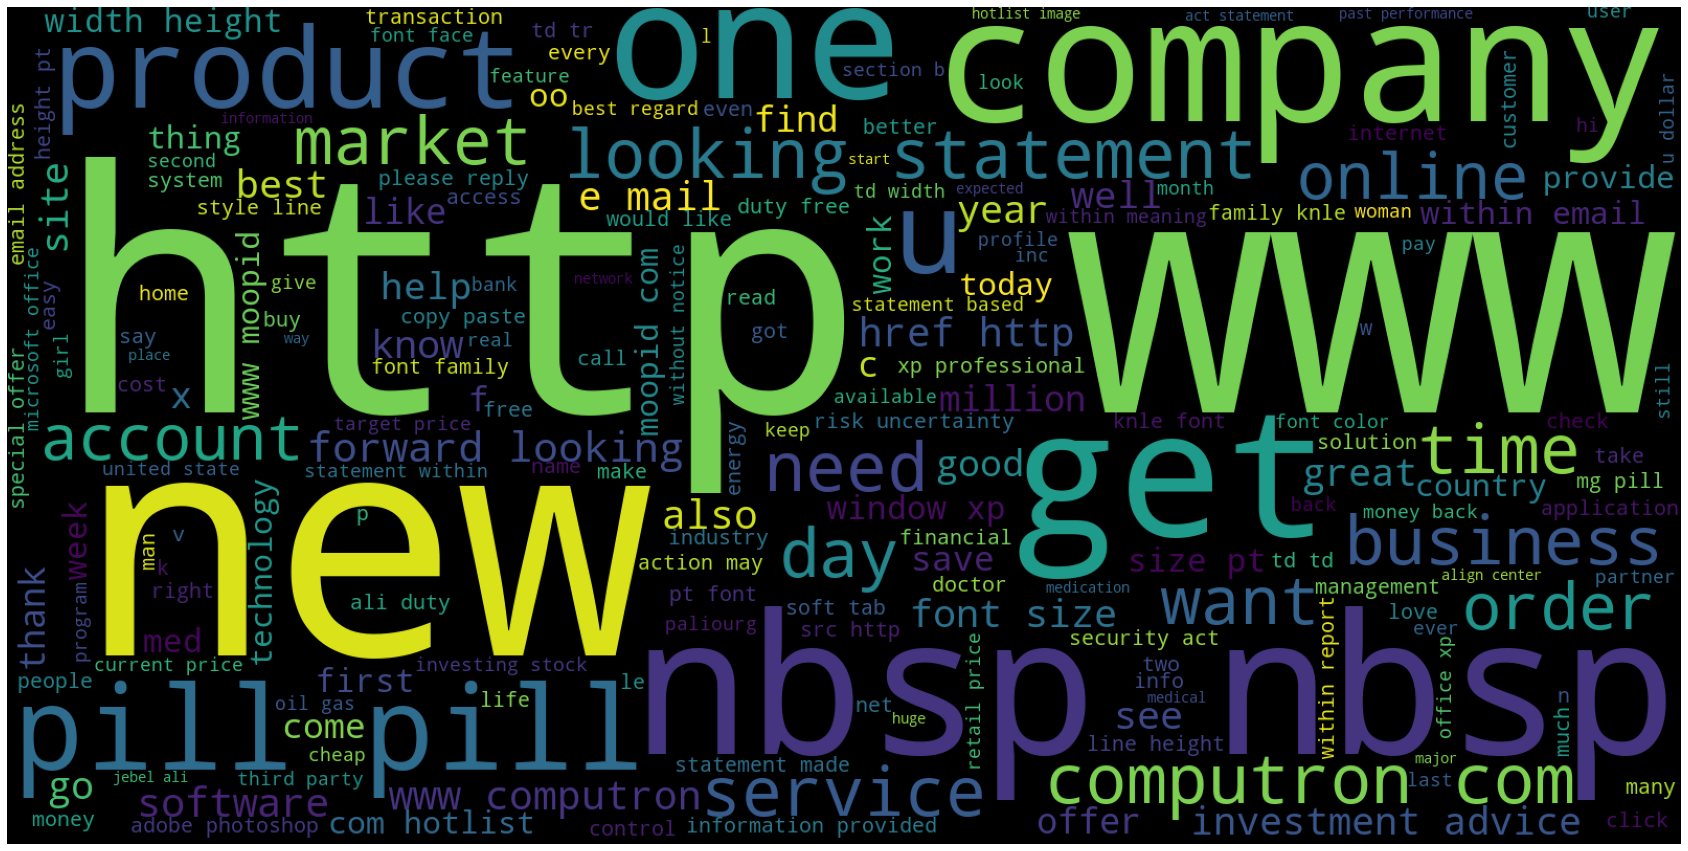

In [39]:
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

### Converting Text to Numerical vectors - Word2Vec Representation

**Step 1** - Import `Word2Vec` module from `gensim.models`  
**Step 2** - Convert the sentences to the List of Words (i.e. List of Tokens)  
**Step 3** - Use Word2Vec to learn numerical vectors for each unique words. Word2Vec uses the list of tokens and generate 300Dimensional numerical vector for each unique word.  
**Step 4** - Convert the word vectors to document vectors.

In [40]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36


In [41]:
! pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [42]:
import gensim

print(gensim.__version__)

4.2.0


In [43]:
from gensim.models import Word2Vec

In [44]:
X_train['tokenised_sentences'] = X_train.clean_text_lemma.apply(lambda sent : sent.split())

X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new..."


In [45]:
# train model

model = Word2Vec(list(X_train.tokenised_sentences), vector_size=300, min_count=1)

In [46]:
print(model)

Word2Vec<vocab=38718, vector_size=300, alpha=0.025>


In [47]:
# Checking the shape of vectors learned by the model

print(model.wv.__getitem__(model.wv.index_to_key).shape)

(38718, 300)


In [48]:
def document_vector(doc, keyed_vectors):
    """Remove out-of-vocabulary words. Create document vectors by averaging word vectors."""
    vocab_tokens = [word for word in doc if word in keyed_vectors.index_to_key]
    return np.mean(keyed_vectors.__getitem__(vocab_tokens), axis=0)

In [49]:
X_train['doc_vector'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|██████████| 4136/4136 [00:41<00:00, 99.56it/s] 


In [50]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022..."


In [51]:
X_train_w2v = list(X_train.doc_vector)

### Preprocessing the Test Data

In [52]:
X_test.head()

,text
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ..."
1988,Subject: online pharxmacy 80 % off all meds\r\...
1235,Subject: re : nom / actual volume for april 17...
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...
4903,Subject: re : coastal oil & gas corporation\r\...


In [53]:
temp_df = X_test['text'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████| 1035/1035 [00:14<00:00, 72.76it/s]


,0,1
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [54]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
1566,subject hpl nom march see attached file hplno ...,11
1988,subject online pharxmacy med disscount phafrma...,2590
1235,subject nom actual volume april th agree eilee...,44
2868,subject meter dec robert put head together dec...,332
4903,subject coastal oil gas corporation melissa de...,1241


In [55]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,text,clean_text_lemma,text_length_lemma
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",subject hpl nom march see attached file hplno ...,11
1988,Subject: online pharxmacy 80 % off all meds\r\...,subject online pharxmacy med disscount phafrma...,2590
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,subject meter dec robert put head together dec...,332
4903,Subject: re : coastal oil & gas corporation\r\...,subject coastal oil gas corporation melissa de...,1241


In [56]:
X_test['tokenised_sentences'] = X_test.clean_text_lemma.apply(lambda sent : sent.split())

X_test.head()

,text,clean_text_lemma,text_length_lemma,tokenised_sentences
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",subject hpl nom march see attached file hplno ...,11,"[subject, hpl, nom, march, see, attached, file..."
1988,Subject: online pharxmacy 80 % off all meds\r\...,subject online pharxmacy med disscount phafrma...,2590,"[subject, online, pharxmacy, med, disscount, p..."
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44,"[subject, nom, actual, volume, april, th, agre..."
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,subject meter dec robert put head together dec...,332,"[subject, meter, dec, robert, put, head, toget..."
4903,Subject: re : coastal oil & gas corporation\r\...,subject coastal oil gas corporation melissa de...,1241,"[subject, coastal, oil, gas, corporation, meli..."


In [57]:
X_test['doc_vector'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, model.wv))

100%|██████████| 1035/1035 [00:10<00:00, 99.83it/s]


In [58]:
X_test.head()

,text,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",subject hpl nom march see attached file hplno ...,11,"[subject, hpl, nom, march, see, attached, file...","[-0.21408392, -0.08263072, 0.3325268, 0.113644..."
1988,Subject: online pharxmacy 80 % off all meds\r\...,subject online pharxmacy med disscount phafrma...,2590,"[subject, online, pharxmacy, med, disscount, p...","[-0.035383586, -0.0050972146, 0.083683394, 0.0..."
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44,"[subject, nom, actual, volume, april, th, agre...","[-0.43224943, -0.07589668, 0.63574445, 0.27136..."
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,subject meter dec robert put head together dec...,332,"[subject, meter, dec, robert, put, head, toget...","[-0.13895202, -0.09991178, 0.4854757, 0.192677..."
4903,Subject: re : coastal oil & gas corporation\r\...,subject coastal oil gas corporation melissa de...,1241,"[subject, coastal, oil, gas, corporation, meli...","[-0.14272015, -0.1601764, 0.47574, 0.3205623, ..."


In [59]:
X_test_w2v = list(X_test.doc_vector)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_w2v, y_train)

LogisticRegression()

In [61]:
y_test_pred = classifier.predict(X_test_w2v)

In [62]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9545893719806763
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       742
        spam       0.92      0.92      0.92       293

    accuracy                           0.95      1035
   macro avg       0.94      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_w2v, y_train)

DecisionTreeClassifier()

In [64]:
y_test_pred = classifier.predict(X_test_w2v)

In [65]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9285024154589372
              precision    recall  f1-score   support

         ham       0.95      0.96      0.95       742
        spam       0.88      0.86      0.87       293

    accuracy                           0.93      1035
   macro avg       0.91      0.91      0.91      1035
weighted avg       0.93      0.93      0.93      1035



### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_w2v, y_train)

RandomForestClassifier()

In [67]:
y_test_pred = classifier.predict(X_test_w2v)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9565217391304348
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97       742
        spam       0.93      0.91      0.92       293

    accuracy                           0.96      1035
   macro avg       0.95      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



## Pretrained GloVe for Sentence Vector

In [69]:
import gensim
import gensim.downloader as api

print(gensim.__version__)

print(list(gensim.downloader.info()['models'].keys()))

4.2.0
['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [70]:
wv = api.load('glove-twitter-50')

# # Approax 200MB Size
# # Save Embeddings
# wv.save('embeddings/50d_glove_vec.kv')

# Load Embeddings
# from gensim.models import KeyedVectors
# wv = KeyedVectors.load('embeddings/50d_glove_vec.kv')

[==================================================] 100.0% 199.5/199.5MB downloaded


In [71]:
# Total number of vocabulary words in pretrained model

len(wv.index_to_key)

1193514

In [72]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022..."


In [73]:
X_train['doc_vector_pretrained_glove'] = X_train.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

# 20 - 30 mins Run Time

100%|██████████| 4136/4136 [13:57<00:00,  4.94it/s]


In [74]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409..."


In [75]:
X_train_glove_pretrained = list(X_train.doc_vector_pretrained_glove)

In [76]:
X_test.head()

,text,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector
1566,"Subject: hpl nom for march 30 , 2001\r\n( see ...",subject hpl nom march see attached file hplno ...,11,"[subject, hpl, nom, march, see, attached, file...","[-0.21408392, -0.08263072, 0.3325268, 0.113644..."
1988,Subject: online pharxmacy 80 % off all meds\r\...,subject online pharxmacy med disscount phafrma...,2590,"[subject, online, pharxmacy, med, disscount, p...","[-0.035383586, -0.0050972146, 0.083683394, 0.0..."
1235,Subject: re : nom / actual volume for april 17...,subject nom actual volume april th agree eilee...,44,"[subject, nom, actual, volume, april, th, agre...","[-0.43224943, -0.07589668, 0.63574445, 0.27136..."
2868,Subject: re : meter 8740 dec 99\r\nrobert and ...,subject meter dec robert put head together dec...,332,"[subject, meter, dec, robert, put, head, toget...","[-0.13895202, -0.09991178, 0.4854757, 0.192677..."
4903,Subject: re : coastal oil & gas corporation\r\...,subject coastal oil gas corporation melissa de...,1241,"[subject, coastal, oil, gas, corporation, meli...","[-0.14272015, -0.1601764, 0.47574, 0.3205623, ..."


In [77]:
X_test['doc_vector_pretrained_glove'] = X_test.tokenised_sentences.progress_apply(lambda x : document_vector(x, wv))

100%|██████████| 1035/1035 [03:38<00:00,  4.74it/s]


In [78]:
X_test_glove_pretrained = list(X_test.doc_vector_pretrained_glove)

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.936231884057971
              precision    recall  f1-score   support

         ham       0.95      0.96      0.96       742
        spam       0.90      0.88      0.89       293

    accuracy                           0.94      1035
   macro avg       0.92      0.92      0.92      1035
weighted avg       0.94      0.94      0.94      1035



### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8840579710144928
              precision    recall  f1-score   support

         ham       0.92      0.92      0.92       742
        spam       0.80      0.78      0.79       293

    accuracy                           0.88      1035
   macro avg       0.86      0.85      0.86      1035
weighted avg       0.88      0.88      0.88      1035



### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_glove_pretrained, y_train)

y_test_pred = classifier.predict(X_test_glove_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.957487922705314
              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       742
        spam       0.95      0.90      0.92       293

    accuracy                           0.96      1035
   macro avg       0.95      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [82]:
X_train.doc_vector.values[1].shape

(300,)

In [83]:
X_train.doc_vector_pretrained_glove.values[1].shape

(50,)

## Pretrained BERT for Sentence Vectors

In [84]:
! pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 3.8 MB/s 
     |████████████████████████████████| 4.9 MB 41.8 MB/s 
     |████████████████████████████████| 1.3 MB 56.4 MB/s 
     |████████████████████████████████| 120 kB 74.6 MB/s 
     |████████████████████████████████| 6.6 MB 57.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=89136563d12f03ba8a31d9b7bbca64592851a764baa7f6dd71f45b5e0f01a667
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers


In [85]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [86]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409..."


In [87]:
X_train['doc_vector_pretrained_bert'] = X_train.clean_text_lemma.progress_apply(model.encode)

X_train.head()

100%|██████████| 4136/4136 [00:57<00:00, 71.85it/s]


,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248...","[-0.030733092, -0.027794827, -0.021859756, 0.0..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875...","[-0.058491174, 7.522334e-05, 0.05152715, -0.00..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970...","[-0.00827709, -0.007367006, -0.06155708, 0.013..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19...","[-0.07980399, -0.018068908, -0.02599305, 0.010..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409...","[-0.0039491476, -0.020886559, -0.0660466, 0.00..."


In [88]:
X_train_bert_pretrained = list(X_train.doc_vector_pretrained_bert)

In [89]:
X_test['doc_vector_pretrained_bert'] = X_test.clean_text_lemma.progress_apply(model.encode)

100%|██████████| 1035/1035 [00:07<00:00, 138.12it/s]


In [90]:
X_test_bert_pretrained = list(X_test.doc_vector_pretrained_bert)

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

classifier = LogisticRegression()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9710144927536232
              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       742
        spam       0.95      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



### Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = DecisionTreeClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.8985507246376812
              precision    recall  f1-score   support

         ham       0.93      0.93      0.93       742
        spam       0.82      0.82      0.82       293

    accuracy                           0.90      1035
   macro avg       0.87      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

classifier = RandomForestClassifier()
classifier.fit(X_train_bert_pretrained, y_train)

y_test_pred = classifier.predict(X_test_bert_pretrained)

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.9594202898550724
              precision    recall  f1-score   support

         ham       0.96      0.98      0.97       742
        spam       0.96      0.90      0.93       293

    accuracy                           0.96      1035
   macro avg       0.96      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



In [94]:
X_train.doc_vector_pretrained_bert.values[1].shape

(384,)

## Visualization for W2V Embeddings

In [95]:
X_train.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences,doc_vector,doc_vector_pretrained_glove,doc_vector_pretrained_bert
5132,Subject: april activity surveys\r\nwe are star...,subject april activ survey start collect data ...,88,subject april activity survey starting collect...,88,"[subject, april, activity, survey, starting, c...","[-0.24035993, 0.049364664, 0.39081848, -0.0648...","[0.18621682, 0.3413227, -0.14527206, -0.200248...","[-0.030733092, -0.027794827, -0.021859756, 0.0..."
2067,Subject: message subject\r\nhey i ' am julie ^...,subject messag subject hey juli turn high scho...,44,subject message subject hey julie turned high ...,44,"[subject, message, subject, hey, julie, turned...","[-0.1464939, -0.13604523, 0.44550875, -0.06564...","[0.29842275, 0.31679434, -0.077173, -0.2029875...","[-0.058491174, 7.522334e-05, 0.05152715, -0.00..."
4716,Subject: txu fuels / sds nomination for may 20...,subject txu fuel sd nomin may attach may nomin...,34,subject txu fuel sd nomination may attached ma...,34,"[subject, txu, fuel, sd, nomination, may, atta...","[-0.40202793, 0.110785946, 0.42862943, 0.12938...","[-0.027421294, 0.12978429, -0.2759833, 0.08970...","[-0.00827709, -0.007367006, -0.06155708, 0.013..."
4710,Subject: re : richardson volumes nov 99 and de...,subject richardson volum nov dec meter nick su...,105,subject richardson volume nov dec meter nick s...,105,"[subject, richardson, volume, nov, dec, meter,...","[-0.19907758, 0.10829403, 0.4162109, 0.1015640...","[0.0133334985, 0.09176367, 0.0146043515, -0.19...","[-0.07980399, -0.018068908, -0.02599305, 0.010..."
2268,Subject: a new era of online medical care .\r\...,subject new era onlin medic care new era onlin...,36,subject new era online medical care new era on...,36,"[subject, new, era, online, medical, care, new...","[-0.12174627, -0.028855046, 0.33178717, -0.022...","[0.31256807, 0.25356603, -0.043327093, 0.19409...","[-0.0039491476, -0.020886559, -0.0660466, 0.00..."


In [107]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [109]:
w2v_embeddings = np.array(X_train['doc_vector'].tolist())

w2v_embeddings.shape

(4136, 300)

In [121]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

4136

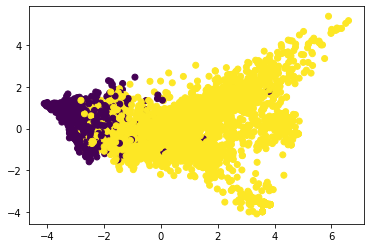

In [120]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(w2v_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


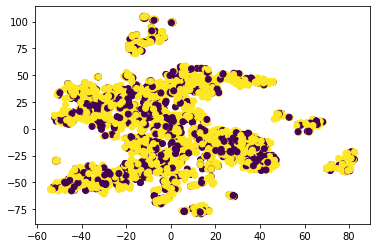

In [126]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

tsne_data = tsne.fit_transform(w2v_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()

## Visualization for Pretrained GloVe Embeddings

In [122]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [123]:
pretrained_glove_embeddings = np.array(X_train['doc_vector_pretrained_glove'].tolist())

pretrained_glove_embeddings.shape

(4136, 50)

In [124]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

4136

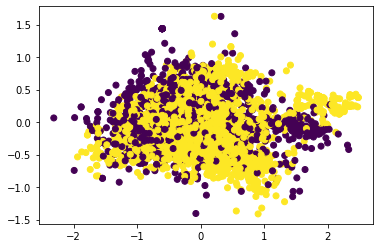

In [125]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_glove_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


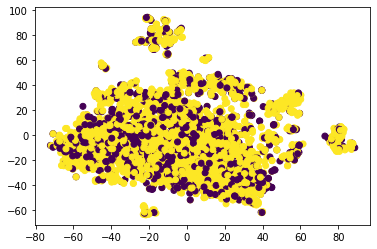

In [127]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=1000)

tsne_data = tsne.fit_transform(pretrained_glove_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()

## Visualization for Pretrained BERT Embeddings

In [128]:
X_train.columns

Index(['text', 'clean_text_stem', 'text_length_stem', 'clean_text_lemma',
       'text_length_lemma', 'tokenised_sentences', 'doc_vector',
       'doc_vector_pretrained_glove', 'doc_vector_pretrained_bert'],
      dtype='object')

In [129]:
pretrained_bert_embeddings = np.array(X_train['doc_vector_pretrained_bert'].tolist())

pretrained_bert_embeddings.shape

(4136, 384)

In [130]:
labels = y_train.apply(lambda x : 1 if x=='ham' else 0)

len(labels)

4136

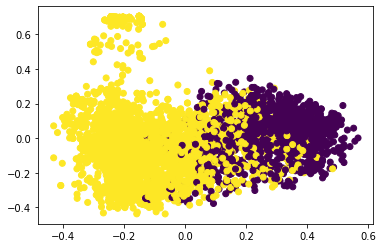

In [131]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(pretrained_bert_embeddings)

pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2"))
pca_df["labels"] = labels

plt.scatter(pca_df['Dim_1'], pca_df['Dim_2'], c=pca_df['labels'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


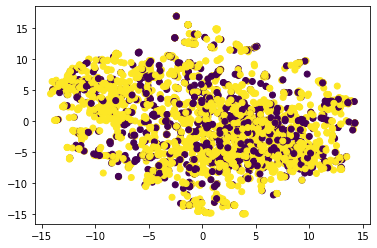

In [140]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0, n_iter=300)

tsne_data = tsne.fit_transform(pretrained_bert_embeddings)

tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2"))
tsne_df["labels"] = labels

plt.scatter(tsne_df['Dim_1'], tsne_df['Dim_2'], c=tsne_df['labels'])
plt.show()